## IMPORT LIBRARY

In [170]:
# 1. IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import os

Kode ini menyiapkan semua alat penting untuk memproses data, membangun model klasifikasi dengan Random Forest, mengevaluasi performanya, dan menyimpan hasilnya agar bisa digunakan dalam aplikasi prediksi ke depannya.

**Penjelasan Singkat:**

pandas & numpy: Untuk membaca dan mengolah data.

RandomForestClassifier: Algoritma klasifikasi berbasis banyak pohon keputusan.

train_test_split: Membagi data menjadi latih dan uji.

classification_report, confusion_matrix, accuracy_score: Mengevaluasi kinerja model.

matplotlib.pyplot: Membuat grafik (jika diperlukan).

joblib: Menyimpan/memuat model.

os: Mengelola file dan direktori.

## LOAD DATA

In [171]:
file_path = 'dataset_dengan_ipk_rata2.csv'
df = pd.read_csv(file_path)

kode diatas digunakan untuk melakukan prosses load terhadap dataset yang akan digunakan yaitu dataset_risiko_do_mahasiswa.csv

## PREPROCESSING

In [172]:
# Menampilkan informasi dasar dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1500 non-null   object 
 1   Kehadiran_Rata       1500 non-null   float64
 2   Remedial_Total       1500 non-null   int64  
 3   Aktivitas_Online     1500 non-null   int64  
 4   Pekerjaan            1500 non-null   object 
 5   Jam_Kerja_Mingguan   1500 non-null   int64  
 6   Pendapatan_OrangTua  1500 non-null   float64
 7   Tanggungan_Keluarga  1500 non-null   int64  
 8   Risiko_DO            1500 non-null   object 
 9   IPK                  1500 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 117.3+ KB
None


kode diatas digunakan untuk menampilkan info dari dataset yang digunakan

In [173]:
# Menampilkan statistik deskriptif dataset
print(df.describe())

       Kehadiran_Rata  Remedial_Total  Aktivitas_Online  Jam_Kerja_Mingguan  \
count     1500.000000     1500.000000       1500.000000         1500.000000   
mean        80.034600        1.489333         10.040667            7.542667   
std          9.736845        1.234059          3.145199           12.633656   
min         50.000000        0.000000          2.000000            0.000000   
25%         73.700000        1.000000          8.000000            0.000000   
50%         80.150000        1.000000         10.000000            0.000000   
75%         86.700000        2.000000         12.000000           15.000000   
max        100.000000        6.000000         20.000000           40.000000   

       Pendapatan_OrangTua  Tanggungan_Keluarga          IPK  
count          1500.000000          1500.000000  1500.000000  
mean              6.049000             5.646667     2.812100  
std               2.014343             2.880629     0.538249  
min               1.000000          

kode diatas digunakan untuk Menampilkan statistik deskriptif dari dataset yang digunakan

In [174]:
# Mengecek missing value
print(df.isnull().sum())

ID                     0
Kehadiran_Rata         0
Remedial_Total         0
Aktivitas_Online       0
Pekerjaan              0
Jam_Kerja_Mingguan     0
Pendapatan_OrangTua    0
Tanggungan_Keluarga    0
Risiko_DO              0
IPK                    0
dtype: int64


kode diatas digunakan untuk melihat apakah ada kolom yang didalamnya terdapat nilai yang kosong atau null

In [175]:
# Mengecek Data Duplikat
print(df.duplicated().sum())

0


kode diatas digunakan untuk mengecek apakah terdapat data duplicat pada dataset yang digunakan. output yang keluar akan menunjukan seberapa banyak data yang duplikat

In [176]:
# Tampilkan kolom-kolom dengan nilai unik "Ya" atau "Tidak"
for col in df.columns:
    if df[col].dropna().isin(['Ya', 'Tidak']).all():
        df[col] = df[col].map({'Ya': 1, 'Tidak': 0})

# Simpan dataset yang telah diproses
df.to_csv("dataset_risiko_do_mahasiswa_encoded.csv", index=False)

print("✅ Preprocessing selesai. Data disimpan ke 'dataset_risiko_do_mahasiswa_encoded.csv'.")


✅ Preprocessing selesai. Data disimpan ke 'dataset_risiko_do_mahasiswa_encoded.csv'.


kode diatas digunakan untuk mengubah nilai yang ada pada dataset, tepatnya pada kolom yang memiliki nilai ya atau tidak. nilai tersebut akan di ubah menjadi 0 untuk tidak dan 1 untuk ya. hal ini digunakan untuk memudahkan model membaca data yang di berikan sehingga membantu proses pelatihan atau klasifikasi pada dataset yang digunakan.

In [177]:
# Definisikan kolom target
target_column = 'Risiko_DO'
print(f"🎯 Kolom target yang digunakan: '{target_column}'")

🎯 Kolom target yang digunakan: 'Risiko_DO'


Kode tersebut merupakan langkah krusial dalam tahap persiapan data, di mana Anda secara eksplisit memberi tahu program kolom mana yang menjadi tujuan atau target prediksi. Dengan menetapkan target_column = 'Risiko_DO', Anda mendefinisikan bahwa semua kolom lain akan digunakan untuk mencoba memprediksi nilai di kolom 'Risiko_DO' ini. Pernyataan print setelahnya berfungsi sebagai konfirmasi sederhana untuk memastikan bahwa kolom yang benar telah dipilih sebagai target sebelum melanjutkan ke proses selanjutnya.

In [178]:
# Pisahkan fitur (X) dan target (y)
# Hapus kolom 'ID' karena tidak relevan untuk prediksi
X = df.drop([target_column, 'ID'], axis=1)
y = df[target_column]

Kode ini melakukan langkah fundamental dalam persiapan data machine learning dengan memecah dataset menjadi dua komponen utama. Variabel X dibuat sebagai himpunan fitur, yang berisi semua kolom dari data asli yang akan digunakan sebagai input untuk prediksi, namun dengan membuang kolom target ('Risiko_DO') dan kolom identitas ('ID') yang tidak relevan. Sementara itu, variabel y secara spesifik diisolasi untuk menampung data target, yaitu kolom 'Risiko_DO' yang nilainya ingin kita prediksi. Pemisahan ini esensial agar kita bisa melatih model untuk mempelajari pola dari X guna menebak hasil di y.

In [179]:
# Encoding: Mengubah semua kolom kategorikal (tipe 'object') menjadi numerik
# pd.get_dummies() secara otomatis mengubah kolom 'Pekerjaan' menjadi 'Pekerjaan_Ya' (0 atau 1)
print("\n🔄 Mengubah data kategorikal menjadi numerik (One-Hot Encoding)...")
X_encoded = pd.get_dummies(X, drop_first=True)
print("Kolom setelah encoding:", X_encoded.columns.tolist())


🔄 Mengubah data kategorikal menjadi numerik (One-Hot Encoding)...
Kolom setelah encoding: ['Kehadiran_Rata', 'Remedial_Total', 'Aktivitas_Online', 'Pekerjaan', 'Jam_Kerja_Mingguan', 'Pendapatan_OrangTua', 'Tanggungan_Keluarga', 'IPK']


Kode ini melakukan langkah encoding, yaitu mengubah semua kolom yang berisi data non-numerik (seperti teks) di dalam himpunan fitur X menjadi format angka yang dapat dipahami oleh model machine learning. Secara spesifik, ia menggunakan fungsi pd.get_dummies untuk melakukan one-hot encoding pada kolom 'Pekerjaan'. Proses ini secara efektif mengubah kolom 'Pekerjaan' menjadi kolom baru bernama Pekerjaan_Ya, di mana nilai 1 merepresentasikan 'Ya' dan 0 merepresentasikan 'Tidak'. Penggunaan drop_first=True adalah praktik standar untuk menghindari redundansi data, sehingga X_encoded yang dihasilkan kini sepenuhnya numerik dan siap untuk tahap selanjutnya.

## SPLIT DATA

In [180]:
print(y.value_counts())

Risiko_DO
0    1319
1     181
Name: count, dtype: int64


In [181]:
# Pembagian data: 80% untuk training, 20% untuk testing
# stratify=y memastikan proporsi target di train dan test set sama
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\n📊 Data dibagi menjadi: {X_train.shape[0]} baris training dan {X_test.shape[0]} baris testing.")


📊 Data dibagi menjadi: 1200 baris training dan 300 baris testing.


Membagi dataset menjadi 80% training dan 20% testing

# MODELLING & EVALUASI

In [182]:


# 4. PEMODELAN (MODELING)
# Inisialisasi model Random Forest
# n_estimators = jumlah pohon, max_depth bisa dikontrol jika perlu, random_state untuk replikasi
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

print("Model Random Forest berhasil dilatih.")

Model Random Forest berhasil dilatih.


Kode ini merupakan bagian dari tahap pemodelan dalam proses machine learning, di mana model yang digunakan adalah Random Forest Classifier dari pustaka scikit-learn. Random Forest adalah algoritma berbasis ensemble yang menggabungkan banyak pohon keputusan (decision trees) untuk menghasilkan prediksi yang lebih akurat dan stabil. Pada baris pertama, model diinisialisasi dengan parameter n_estimators=100, yang berarti model akan membangun 100 pohon keputusan. Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan, karena proses pelatihan model melibatkan elemen acak. Selanjutnya, perintah model.fit(X_train, y_train) digunakan untuk melatih model menggunakan data latih, yaitu fitur (X_train) dan label target (y_train). Setelah model selesai dilatih, pernyataan print("Model Random Forest berhasil dilatih.") akan menampilkan pesan bahwa proses pelatihan telah berhasil dilakukan. Tahap ini sangat penting karena model yang telah dilatih inilah yang nantinya akan digunakan untuk melakukan prediksi terhadap data baru.









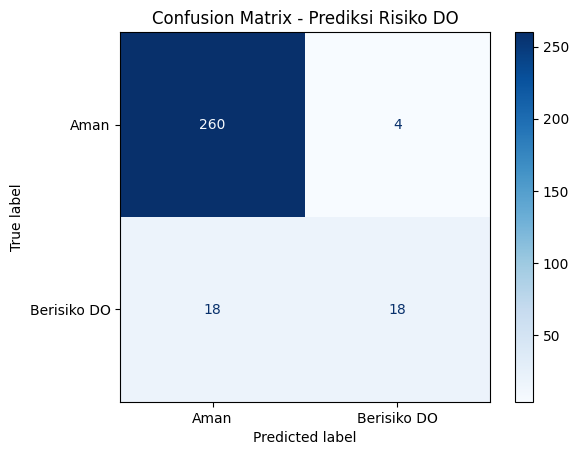


📈 Akurasi Model: 92.67%
              precision    recall  f1-score   support

        Aman       0.94      0.98      0.96       264
 Berisiko DO       0.82      0.50      0.62        36

    accuracy                           0.93       300
   macro avg       0.88      0.74      0.79       300
weighted avg       0.92      0.93      0.92       300



In [183]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aman", "Berisiko DO"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Prediksi Risiko DO")
plt.show()
print(f"\n📈 Akurasi Model: {accuracy_score(y_test, y_pred):.2%}")
# 7. Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=["Aman", "Berisiko DO"]))

Kode ini merupakan bagian dari **tahap evaluasi model** dalam proses machine learning, yang bertujuan untuk menilai seberapa baik model Random Forest yang telah dilatih dalam memprediksi data yang belum pernah dilihat sebelumnya (data uji/test).

Pertama, `model.predict(X_test)` digunakan untuk menghasilkan prediksi terhadap fitur-fitur dalam data uji (`X_test`). Hasil prediksi ini disimpan dalam variabel `y_pred`.

Selanjutnya, kode mencetak akurasi model menggunakan `accuracy_score(y_test, y_pred)`, yaitu rasio prediksi yang benar dibandingkan dengan total jumlah prediksi. Akurasi ditampilkan dalam bentuk persentase dengan dua angka desimal untuk memudahkan interpretasi.

Kemudian, `confusion_matrix(y_test, y_pred)` digunakan untuk menampilkan matriks kebingungan (*confusion matrix*), yang menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas (kelas 0 = "Aman", kelas 1 = "Risiko DO"). Ini membantu mengevaluasi kesalahan tipe I (false positive) dan tipe II (false negative).

Terakhir, `classification_report(y_test, y_pred, target_names=target_names)` memberikan ringkasan metrik performa model seperti **precision**, **recall**, **f1-score**, dan **support** untuk setiap kelas. Ini sangat berguna untuk memahami seberapa baik model membedakan antar kelas, khususnya ketika data tidak seimbang.

Secara keseluruhan, bagian kode ini memberikan gambaran menyeluruh tentang performa model dalam memprediksi risiko DO mahasiswa.


## EXPORT & INFERENSI

In [184]:
model_filename = 'model_prediksi_do.pkl'
columns_filename = 'kolom_model.pkl'

joblib.dump(model, model_filename)
joblib.dump(X_train.columns.tolist(), columns_filename)

print(f"Model telah disimpan sebagai '{model_filename}'")
print(f"Kolom model telah disimpan sebagai '{columns_filename}'")

Model telah disimpan sebagai 'model_prediksi_do.pkl'
Kolom model telah disimpan sebagai 'kolom_model.pkl'


In [185]:
import os
import pandas as pd
import joblib

def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

def get_numeric_input(prompt, input_type=float, min_value=None, max_value=None):
    while True:
        try:
            value = input_type(input(prompt))
            if min_value is not None and value < min_value:
                print(f"❌ Nilai terlalu kecil. Harus minimal {min_value}.")
                continue
            if max_value is not None and value > max_value:
                print(f"❌ Nilai terlalu besar. Maksimal {max_value}.")
                continue
            return value
        except ValueError:
            print("❌ Input tidak valid. Harap masukkan angka.")

def get_categorical_input(prompt, options):
    while True:
        value = input(prompt).strip().capitalize()
        if value in options:
            return value
        else:
            print(f"❌ Input tidak valid. Harap masukkan salah satu dari: {', '.join(options)}")

# --- MEMUAT MODEL ---
try:
    loaded_model = joblib.load('model_prediksi_do.pkl')
    model_columns = joblib.load('kolom_model.pkl')
    print("✅ Model dan kolom berhasil dimuat.")
except FileNotFoundError:
    print("❌ Error: File model 'model_prediksi_do.pkl' atau 'kolom_model.pkl' tidak ditemukan.")
    exit()

# --- FUNGSI PREDIKSI ---
def prediksi_risiko_do(data_mahasiswa):
    df_input = pd.DataFrame([data_mahasiswa])
    df_processed = pd.get_dummies(df_input, drop_first=True)
    df_aligned = df_processed.reindex(columns=model_columns, fill_value=0)
    prediksi = loaded_model.predict(df_aligned)
    probabilitas = loaded_model.predict_proba(df_aligned)
    return prediksi[0], probabilitas[0]

# --- FUNGSI SARAN ---
def berikan_saran(data_mahasiswa):
    saran_list = []

    if data_mahasiswa['IPK'] < 2.75:
        saran_list.append("💡 IPK Anda berada di bawah batas aman. Segera diskusikan strategi akademik dengan DPA.")
    if data_mahasiswa['Kehadiran_Rata'] < 80.0:
        saran_list.append("📌 Kehadiran Anda rendah. Usahakan lebih konsisten hadir di kelas.")
    if data_mahasiswa['Remedial_Total'] > 2:
        saran_list.append("📚 Terlalu banyak remedial. Pertimbangkan mendaftar program belajar tambahan.")
    if data_mahasiswa['Pekerjaan'] == 'Ya' and data_mahasiswa['Jam_Kerja_Mingguan'] > 20:
        saran_list.append("⏰ Jam kerja cukup tinggi. Pertimbangkan manajemen waktu lebih ketat.")
    if data_mahasiswa['Tanggungan_Keluarga'] > 0:
        pendapatan_per_tanggungan = data_mahasiswa['Pendapatan_OrangTua'] / data_mahasiswa['Tanggungan_Keluarga']
        if pendapatan_per_tanggungan < 1.5:
            saran_list.append("💰 Finansial keluarga terbatas. Coba cari informasi beasiswa.")

    return saran_list

# --- LOOP UTAMA ---
while True:
    clear_screen()
    print("=============================================")
    print("   Sistem Prediksi Risiko Drop Out Mahasiswa ")
    print("=============================================\n")

    data_baru = {
        'IPK': get_numeric_input("Rata-rata IPK (contoh: 3.2): ", float, 0.0, 4.0),
        'Kehadiran_Rata': get_numeric_input("Rata-rata Kehadiran (%) (contoh: 85): ", float),
        'Remedial_Total': get_numeric_input("Total Remedial (contoh: 2): ", int),
        'Aktivitas_Online': get_numeric_input("Aktivitas Online (jam/minggu) (contoh: 10): ", int),
        'Pekerjaan': get_categorical_input("Apakah mahasiswa bekerja? (Ya/Tidak): ", ['Ya', 'Tidak']),
        'Jam_Kerja_Mingguan': get_numeric_input("Jam Kerja per Minggu (isi 0 jika tidak bekerja): ", int),
        'Pendapatan_OrangTua': get_numeric_input("Pendapatan Orang Tua (juta/bulan) (contoh: 5.5): ", float),
        'Tanggungan_Keluarga': get_numeric_input("Jumlah Tanggungan Keluarga (contoh: 4): ", int),
    }

    prediksi, probabilitas = prediksi_risiko_do(data_baru)

    print("\n------------------ HASIL PREDIKSI ------------------")
    if prediksi == 1:
        print("🔴 Status Prediksi: BERISIKO DROP OUT")
    else:
        print("🟢 Status Prediksi: AMAN")

    print("\nKeyakinan Model:")
    print(f"  - Probabilitas Aman: {probabilitas[0]:.2%}")
    print(f"  - Probabilitas Berisiko DO: {probabilitas[1]:.2%}")

    saran = berikan_saran(data_baru)
    if saran:
        print("\n🔍 Rekomendasi Peningkatan atau Perbaikan:")
        for item in saran:
            print(f"   - {item}")
    else:
        print("\n✅ Tidak ada rekomendasi khusus. Pertahankan performa baik Anda!")

    print("----------------------------------------------------\n")

    lagi = input("Apakah Anda ingin menguji data mahasiswa lain? (y/n): ").strip().lower()
    if lagi != 'y':
        print("\n👋 Terima kasih telah menggunakan sistem prediksi. Sampai jumpa!")
        break


✅ Model dan kolom berhasil dimuat.
   Sistem Prediksi Risiko Drop Out Mahasiswa 

Rata-rata IPK (contoh: 3.2): 4
Rata-rata Kehadiran (%) (contoh: 85): 34
Total Remedial (contoh: 2): 3
Aktivitas Online (jam/minggu) (contoh: 10): 3
Apakah mahasiswa bekerja? (Ya/Tidak): tidak
Jam Kerja per Minggu (isi 0 jika tidak bekerja): 0
Pendapatan Orang Tua (juta/bulan) (contoh: 5.5): 2
Jumlah Tanggungan Keluarga (contoh: 4): 4

------------------ HASIL PREDIKSI ------------------
🟢 Status Prediksi: AMAN

Keyakinan Model:
  - Probabilitas Aman: 61.00%
  - Probabilitas Berisiko DO: 39.00%

🔍 Rekomendasi Peningkatan atau Perbaikan:
   - 📌 Kehadiran Anda rendah. Usahakan lebih konsisten hadir di kelas.
   - 📚 Terlalu banyak remedial. Pertimbangkan mendaftar program belajar tambahan.
   - 💰 Finansial keluarga terbatas. Coba cari informasi beasiswa.
----------------------------------------------------

Apakah Anda ingin menguji data mahasiswa lain? (y/n): y
   Sistem Prediksi Risiko Drop Out Mahasiswa 

